# Test a Perceptual Phenomenon
### _A Stroop Task_

**1. What is our independent variable? What is our dependent variable?**<br>
Independent variable: Word conditions (either congruent or incongruent)
Dependent variable: Time it takes to name the ink colors in seconds

**2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**<br>
Null hypothesis: Incongruent words do not affect reading speed<br>
Alternative hypothesis: Incongruent words affect reading speed

The mean difference in reading speed may or may not be significant. Therefore, a two-tailed t-test should be performed to analyze the dataset. This test is a paired test as each participant in this study has two data points; one for the congruent words and the other for the incongruent words.

An alpha value of 0.05 will be used for this test. We reject the null hypothesis if the calculated probability falls below 0.05.

_The dataset was downloaded as a csv file from the google sheet provided. The following code serves to convert the dataset to a pandas dataframe to be used for analysis._

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [34]:
# Convert stroop data to pandas dataframe
data = pd.read_csv("stroopdata.csv")
display(data.head())

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [14]:
con_mean = data['Congruent'].mean()
con_median = data['Congruent'].median()
con_std = data['Congruent'].std()
incon_mean = data['Incongruent'].mean()
incon_median = data['Incongruent'].median()
incon_std = data['Incongruent'].std()

In [67]:
print("Measure of Central Tendency:")
print("Congruent Mean: " + '%.2f' % con_mean)
print("Congruent Median: " + '%.2f' % con_median)
print("Incongruent Mean: " + '%.2f' % incon_mean)
print("Incongruent Median: " + '%.2f' % incon_median)

Measure of Central Tendency:
Congruent Mean: 14.05
Congruent Median: 14.36
Incongruent Mean: 22.02
Incongruent Median: 21.02


In [68]:
print("Measure of Variability:")
print("Congruent Standard Deviation: " + '%.2f' % con_std)
print("Incongruent Standard Deviation: " + '%.2f' % incon_std)

Measure of Variability:
Congruent Standard Deviation: 3.56
Incongruent Standard Deviation: 4.80


**4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

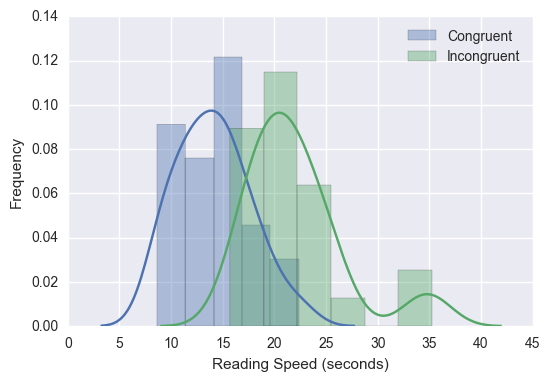

In [32]:
sns.distplot(data['Congruent'], label="Congruent");
sns.distplot(data['Incongruent'], label="Incongruent");
plt.legend()
plt.xlabel("Reading Speed (seconds)")
plt.ylabel("Frequency")
plt.show()

The incongruent dataset is less normally distributed than the congruent dataset. However, the incongruent dataset seems to be skewed to the right due to one point to the far right of the distribution.

**5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**<br>
alpha = 0.05<br>
dof = degrees of freedom = 23

In [66]:
alpha = 0.05
# Calculate degrees of freedom
dof = len(data['Congruent']) - 1
# add column for difference
data['Diff'] = data['Congruent']-data['Incongruent']

# Calculate mean and std for diff
diff_mean = data['Diff'].mean()
diff_std = data['Diff'].std()
diff_stderr = diff_std/len(data['Congruent'])**0.5
t_crit = stats.t.ppf(1-alpha/2, dof)
lower = diff_mean - t_crit*diff_stderr
upper = diff_mean + t_crit*diff_stderr
t_stat = (diff_mean-0)/(diff_std/len(data['Congruent'])**0.5)
pvalue = stats.t.sf(np.abs(t_stat), dof)*2
print("t_crit: -" + '%.2f' % t_crit + " and " + '%.2f' % t_crit)
print('confidence interval: [' + '%.2f' % lower + ',' + '%.2f' % upper + ']')
print('t statistic: ' + '%.2f' % t_stat)
print('pvalue (two-tailed): ' + '%.2e' % pvalue)

t_crit: -2.07 and 2.07
confidence interval: [-10.02,-5.91]
t statistic: -8.02
pvalue (two-tailed): 4.10e-08


The absolute value of the t statistic is much higher than that of the t critical value. In addition, the 95% confidence interval falls outside of 0 which is the targeted value for the mean difference between the two samples. The calculated p-value is less than 0.05. For all the reasons mentioned, the **null hypothesis is rejected**. The results match our expectations of what the Stroop effect is meant to achieve; the congruency of color and words affects our perception.

**6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**<br>

Our brains process data very fast and most of us create images and stories from what we read or see. Color has a more profound effect, sometimes stronger than text. For the test conducted, color may have been processed first for many of the participants and a lag time most likely occured to get the right answer.

A similar task can be to match text with shapes. For instance, the word "square" will be inside a square, triangle, trapezoid, etc.

### **References**
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html<br>
https://faculty.washington.edu/chudler/java/ready.html